# Global Student Life 2025: EDA + Visual Insights (Synthetic Dataset)

This notebook explores the lifestyle and wellness of high school students globally using a synthetic dataset. We focus on stress levels, sleep patterns, AI use for studying, and more.


Install and Import Libraries


In [1]:
# Install required packages (uncomment if needed)
# !pip install pandas seaborn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

# Create directory for saving plots
os.makedirs('plots', exist_ok=True)

def save_plot(fig, filename):
    fig.savefig(os.path.join('plots', filename), bbox_inches='tight')


Load and Preview Data

In [2]:
# Load dataset (update path if needed)
df = pd.read_csv("student_data.csv")  # Renamed for compatibility; adjust as per your file

# Preview the data
df.head()


,id,age,gender,grade,avg_sleep_hours,daily_screen_time,uses_AI_for_study,board_exam_prep,stress_level,country
0,1,17,Male,11,6.1,3.3,Yes,On Track,7,Australia
1,2,18,Male,12,8.4,5.7,No,Revised Fully,8,Germany
2,3,15,Female,12,5.2,7.8,Yes,Falling Behind,6,Brazil
3,4,17,Male,11,8.9,5.3,Yes,Just Started,7,Japan
4,5,17,Male,11,6.1,2.1,No,Just Started,5,Japan


Basic Data Info

In [3]:
# Basic Info
df.info()

# Describe numeric stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   age                500 non-null    int64  
 2   gender             500 non-null    object 
 3   grade              500 non-null    int64  
 4   avg_sleep_hours    500 non-null    float64
 5   daily_screen_time  500 non-null    float64
 6   uses_AI_for_study  500 non-null    object 
 7   board_exam_prep    500 non-null    object 
 8   stress_level       500 non-null    int64  
 9   country            500 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 39.2+ KB


,id,age,grade,avg_sleep_hours,daily_screen_time,stress_level
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,16.592000,11.558000,6.32500,4.619000,6.338000
std,144.481833,1.150732,0.497122,1.48948,1.931808,1.977771
min,1.000000,15.000000,11.000000,3.00000,1.000000,1.000000
25%,125.750000,16.000000,11.000000,5.30000,3.300000,5.000000
50%,250.500000,17.000000,12.000000,6.30000,4.500000,6.000000
75%,375.250000,18.000000,12.000000,7.30000,5.900000,8.000000
max,500.000000,18.000000,12.000000,10.00000,10.900000,10.000000


Categorical Summary

In [4]:
# Value counts for categorical features
categoricals = ['gender', 'country', 'uses_AI_for_study', 'grade', 'board_exam_prep']
for col in categoricals:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")



gender value counts:
gender
Male      240
Female    236
Other      24
Name: count, dtype: int64

country value counts:
country
Australia      60
Japan          54
South Korea    53
Nigeria        52
Germany        50
Brazil         49
Canada         49
India          49
USA            42
UK             42
Name: count, dtype: int64

uses_AI_for_study value counts:
uses_AI_for_study
Yes    333
No     167
Name: count, dtype: int64

grade value counts:
grade
12    279
11    221
Name: count, dtype: int64

board_exam_prep value counts:
board_exam_prep
On Track          174
Revised Fully     118
Falling Behind    117
Just Started       91
Name: count, dtype: int64


Stress Level Distribution

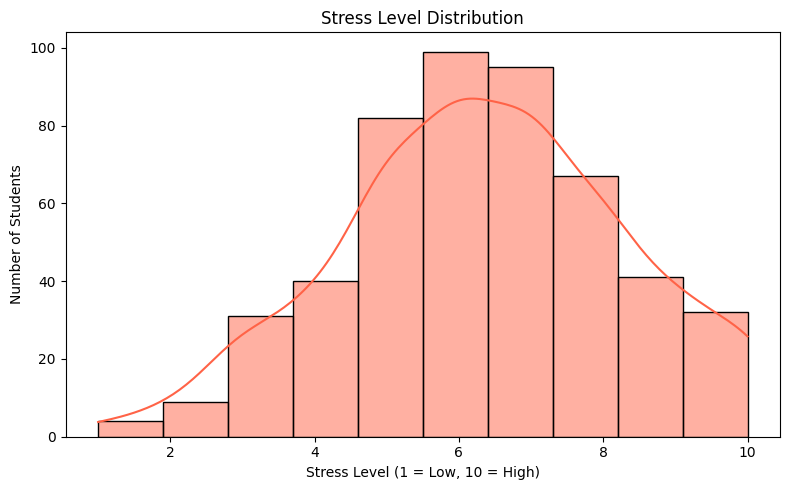

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['stress_level'], bins=10, kde=True, color="tomato")
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level (1 = Low, 10 = High)")
plt.ylabel("Number of Students")
plt.tight_layout()
save_plot(plt.gcf(), "stress_level_distribution.png")
plt.show()


Sleep vs Stress

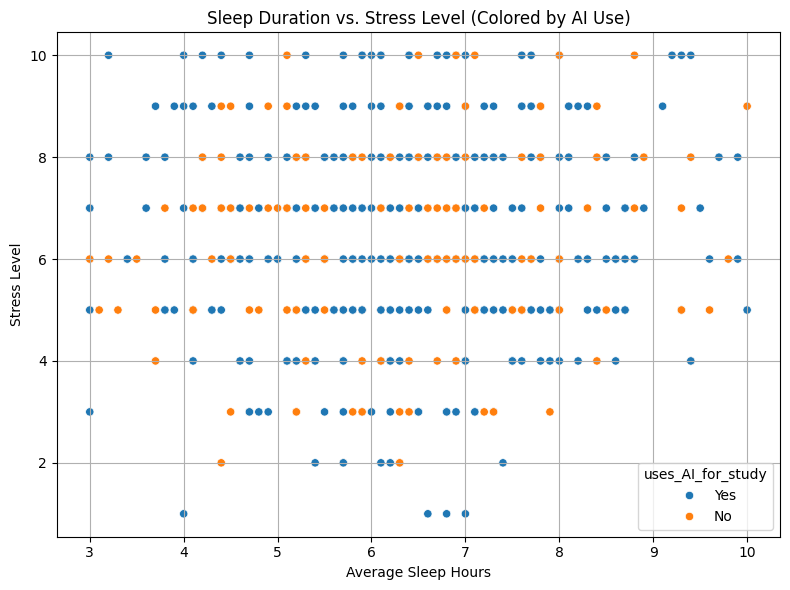

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='avg_sleep_hours', y='stress_level', hue='uses_AI_for_study')
plt.title("Sleep Duration vs. Stress Level (Colored by AI Use)")
plt.xlabel("Average Sleep Hours")
plt.ylabel("Stress Level")
plt.grid(True)
plt.tight_layout()
save_plot(plt.gcf(), "sleep_vs_stress.png")
plt.show()


Country-wise Average Stress Level

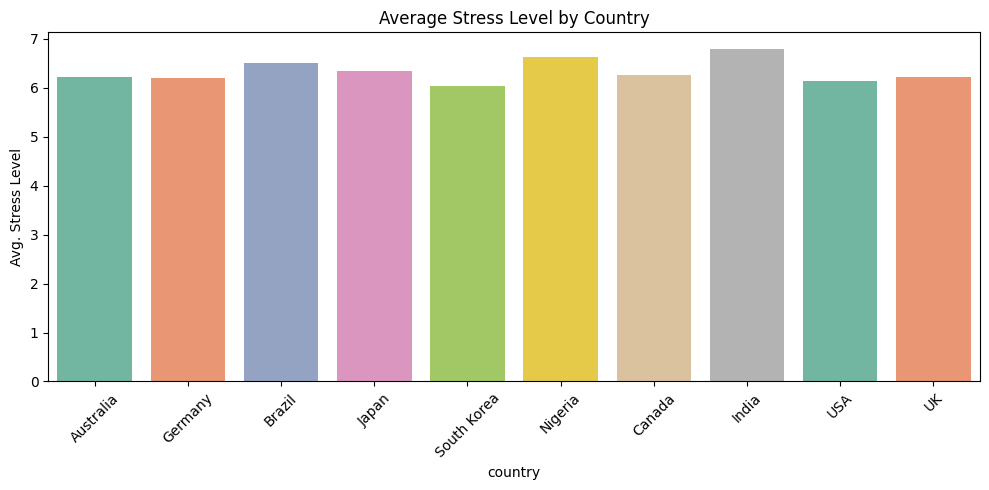

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='country', y='stress_level', estimator='mean', ci=None, palette='Set2')
plt.title("Average Stress Level by Country")
plt.xticks(rotation=45)
plt.ylabel("Avg. Stress Level")
plt.tight_layout()
save_plot(plt.gcf(), "stress_by_country.png")
plt.show()


AI Use by Country

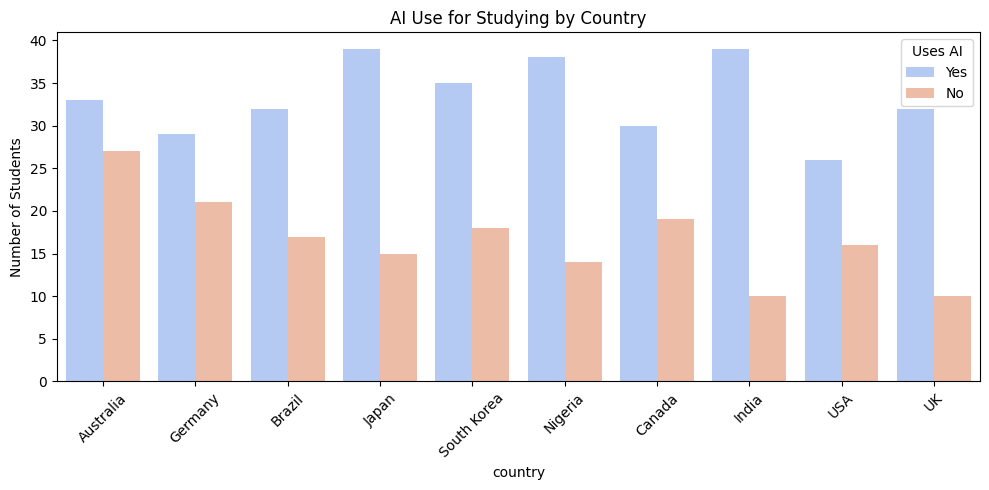

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='country', hue='uses_AI_for_study', palette='coolwarm')
plt.title("AI Use for Studying by Country")
plt.xticks(rotation=45)
plt.ylabel("Number of Students")
plt.legend(title="Uses AI")
plt.tight_layout()
save_plot(plt.gcf(), "ai_use_by_country.png")
plt.show()


Correlation Heatmap

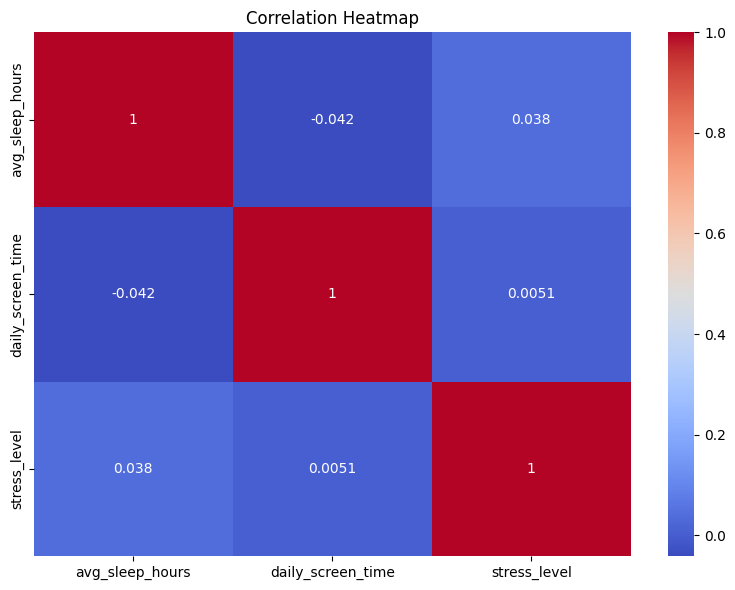

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['avg_sleep_hours', 'daily_screen_time', 'stress_level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
save_plot(plt.gcf(), "correlation_heatmap.png")
plt.show()


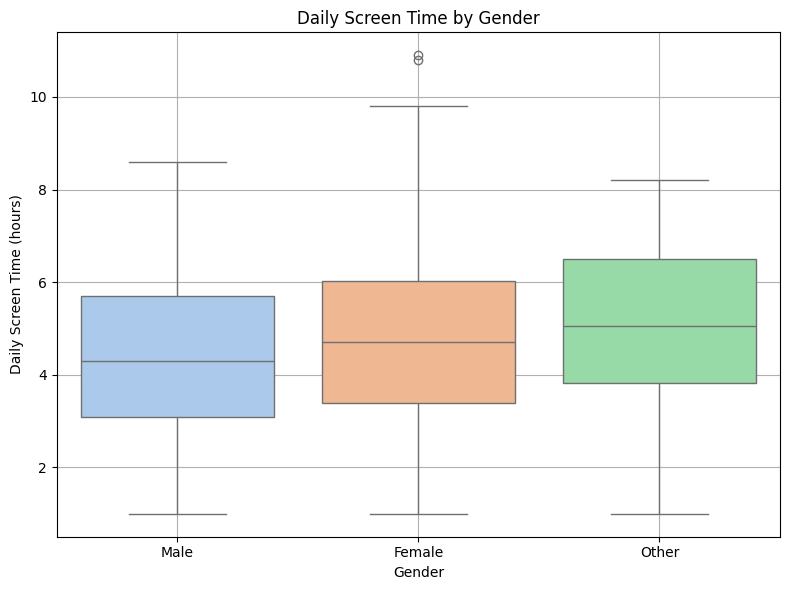

In [10]:
# 1. Boxplot of daily screen time by gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='daily_screen_time', palette='pastel')
plt.title('Daily Screen Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Daily Screen Time (hours)')
plt.grid(True)
plt.tight_layout()
save_plot(plt.gcf(), "screen_time_by_gender.png")
plt.show()


Board Exam Preparation Status by Grade

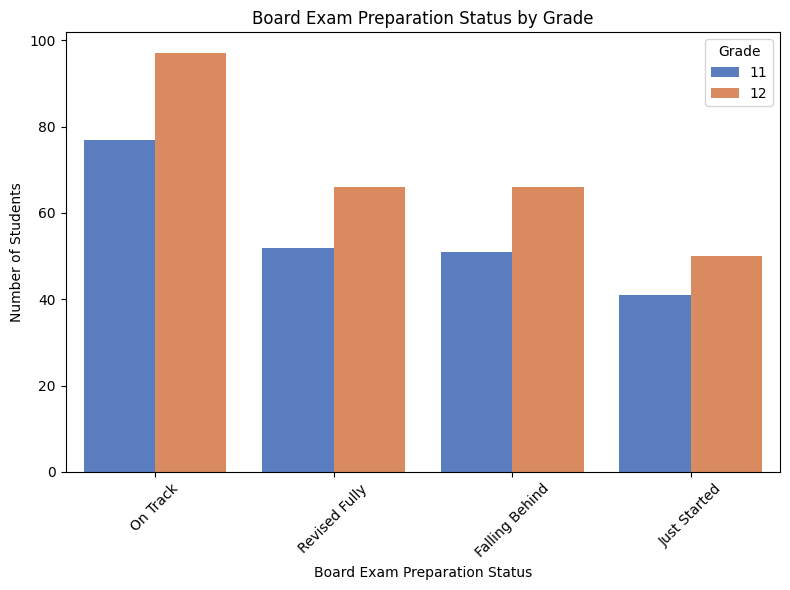

In [11]:
# 2. Countplot of board exam preparation status by grade
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='board_exam_prep', hue='grade', palette='muted')
plt.title('Board Exam Preparation Status by Grade')
plt.xlabel('Board Exam Preparation Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Grade')
plt.tight_layout()
save_plot(plt.gcf(), "exam_prep_by_grade.png")
plt.show()


Stress Level Distribution by AI Use

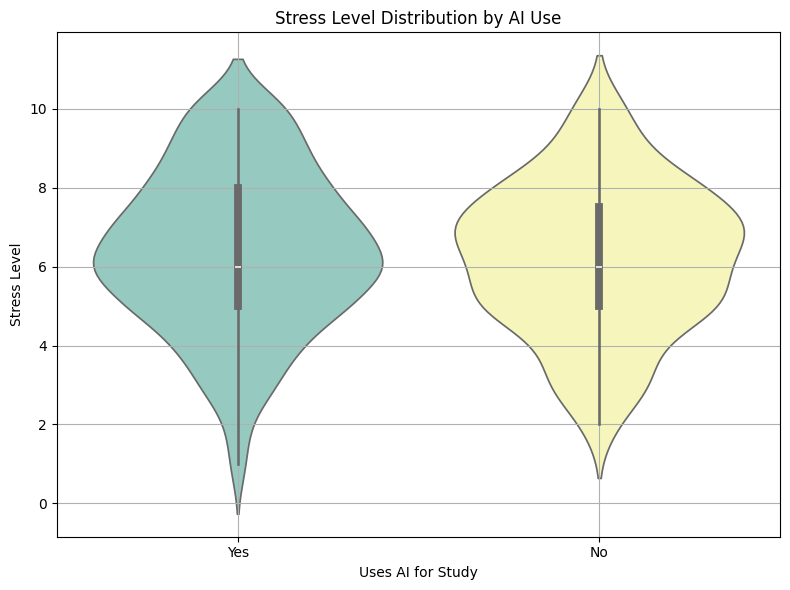

In [12]:
# 3. Violin plot of stress level by uses_AI_for_study
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='uses_AI_for_study', y='stress_level', palette='Set3')
plt.title('Stress Level Distribution by AI Use')
plt.xlabel('Uses AI for Study')
plt.ylabel('Stress Level')
plt.grid(True)
plt.tight_layout()
save_plot(plt.gcf(), "stress_by_ai_use.png")
plt.show()


Pairplot of Numeric Features by Gender



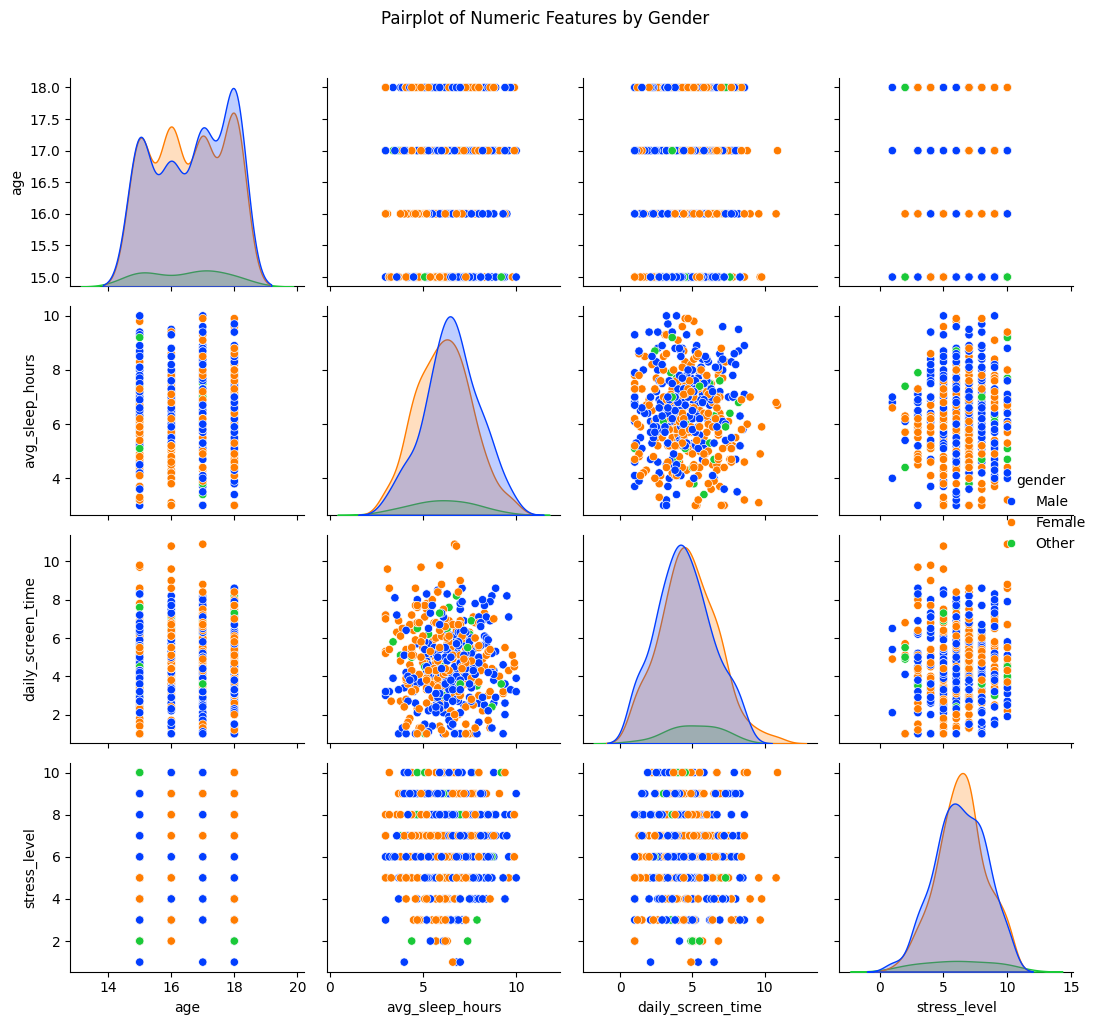

In [13]:
# 4. Pairplot of numeric features colored by gender
sns.pairplot(df[['age', 'avg_sleep_hours', 'daily_screen_time', 'stress_level', 'gender']], hue='gender', palette='bright')
plt.suptitle('Pairplot of Numeric Features by Gender', y=1.02)
plt.tight_layout()
save_plot(plt.gcf(), "pairplot_by_gender.png")
plt.show()


Stacked Bar Chart of AI Use by Country and Gender

<Figure size 1200x600 with 0 Axes>

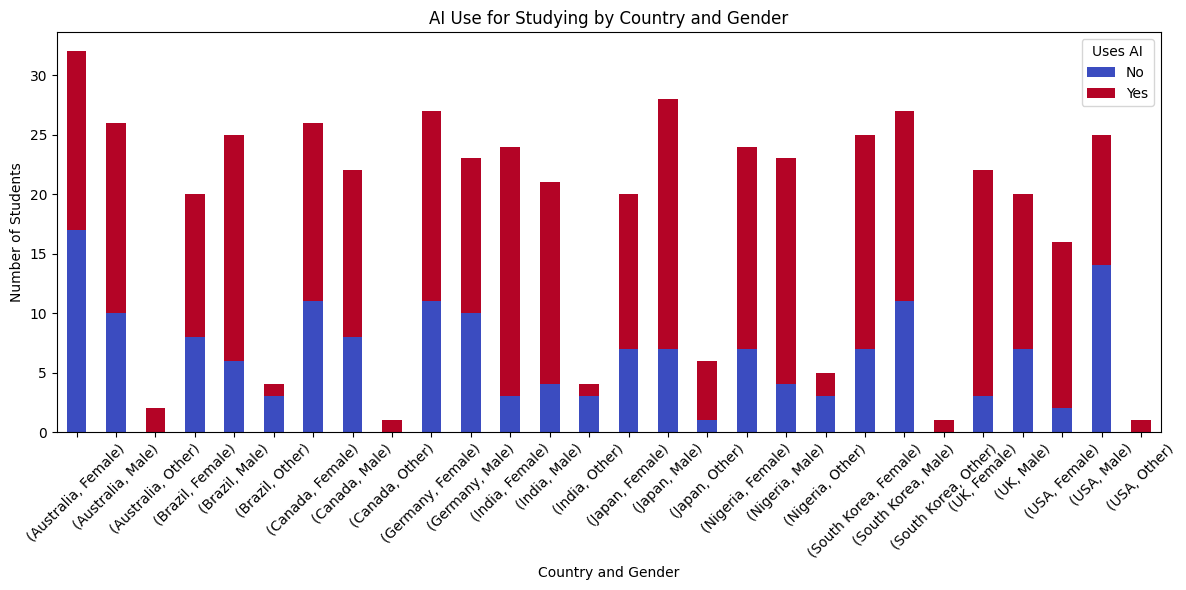

In [14]:
#Stacked bar chart of AI use by country and gender
plt.figure(figsize=(12,6))
stacked_df = df.groupby(['country', 'gender'])['uses_AI_for_study'].value_counts().unstack().fillna(0)
stacked_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('AI Use for Studying by Country and Gender')
plt.xlabel('Country and Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Uses AI')
plt.tight_layout()
save_plot(plt.gcf(), "ai_use_by_country_gender.png")
plt.show()
